In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
"""
使用pytorch 实现反向传播， 利用的模型是 y = w0 + w1 * x + w2 * x**2
"""

'\n使用pytorch 实现反向传播， 利用的模型是 y = w0 + w1 * x + w2 * x**2\n'

In [3]:
input = np.loadtxt("data.txt",delimiter=',')
print(input)

[[ 1.  2.]
 [ 2.  4.]
 [ 3.  6.]
 [ 4.  8.]
 [ 5. 10.]
 [ 6. 12.]]


In [4]:
n_row = input.shape[0]


In [5]:
# init w with torch.tensor 
X = input[:, 0:-1]
Y = input[:, -1]



In [33]:
# 设定训练值
epoch = 80
cost_sum = np.zeros(epoch)
# alpha = 0.01 发现会导致损失值变大
alpha = 0.001


In [34]:
def forward(x):
    t_X = torch.tensor([1, x, x**2])
    #print(t_X)
    return w @ t_X

def loss(x, y):
    y_pred = forward(x)
    
    l_val = (y_pred - y) ** 2
    # print(f"y_pred={y_pred}, y={y}, loss={l_val}")
    return l_val

# 构造神经网络
w = torch.tensor([1.0, 1.0, 1.0], dtype=torch.float64)

w.requires_grad = True
for i in range(0, epoch):
    temp_cost = 0
    for x, y in zip(X, Y):
        #print(f"y_pred={y_pred}")
        l = loss(x, y)
        #print(f"cost={cost.data}")
        l.backward()
        w.data = w.data - alpha * w.grad.data
        w.grad.data.zero_()
        #print("cost", cost.item())
        temp_cost += l.item()
    print(f"curr_cost={temp_cost}")
    cost_sum[i] = temp_cost


y_pred=3.0, y=2.0, loss=1.0
y_pred=6.986, y=4.0, loss=8.916196
y_pred=12.717204, y=6.0, loss=45.12082957761601
y_pred=18.412841944, y=8.0, loss=108.4272773507257
y_pred=18.269802755152, y=10.0, loss=68.3896376091196
y_pred=9.453785309218976, y=12.0, loss=6.483209251549107
curr_cost=238.33714978901043
y_pred=2.0464560269397443, y=2.0, loss=0.002158162439026245
y_pred=3.7255983490603413, y=4.0, loss=0.07529626603841032
y_pred=6.008089536756896, y=6.0, loss=6.544060494116874e-05
y_pred=8.860377754420863, y=8.0, loss=0.7402498803022873
y_pred=11.573270989077512, y=10.0, loss=2.4751816050729336
y_pred=12.355006510227986, y=12.0, loss=0.12602962230425283
curr_cost=3.4189809767618518
y_pred=1.885599359047493, y=2.0, loss=0.0130875066503444
y_pred=3.151675771279808, y=4.0, loss=0.7196539970337086
y_pred=4.810537843761932, y=6.0, loss=1.4148202211225132
y_pred=7.141350783781673, y=8.0, loss=0.7372784765123466
y_pred=10.3555742571316, y=10.0, loss=0.1264330523346894
y_pred=12.870759547194936, y=

/var/folders/_s/b1dqc5_97sv5pf5lm7cdg5y80000gn/T/ipykernel_88478/37010257.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t_X = torch.tensor([1, x, x**2])


In [35]:
x_train = np.arange(epoch)
print(cost_sum.shape, x_train.shape)


(80,) (80,)


Text(0, 0.5, 'cost')

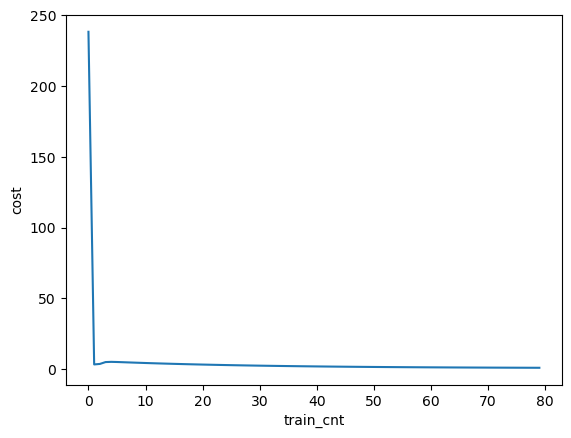

In [36]:
plt.plot(x_train, cost_sum)
plt.xlabel("train_cnt")
plt.ylabel("cost")

In [37]:
w.data

tensor([1.1460, 1.2203, 0.0765], dtype=torch.float64)

In [49]:
# 查看真实模型的预测值
start = 0
end = 20
x_index = range(start, end, 1)
y_pred = np.zeros(len(x_index))
for x in x_index:
    X = torch.tensor([1, x, x**2], dtype=torch.double)
    y_pred[x] = w @ X

In [50]:
y_pred

array([ 1.14597762,  2.44281107,  3.89262008,  5.49540466,  7.25116481,
        9.15990053, 11.22161181, 13.43629866, 15.80396108, 18.32459907,
       20.99821262, 23.82480174, 26.80436642, 29.93690667, 33.22242249,
       36.66091388, 40.25238084, 43.99682336, 47.89424145, 51.9446351 ])

Text(0, 0.5, 'y')

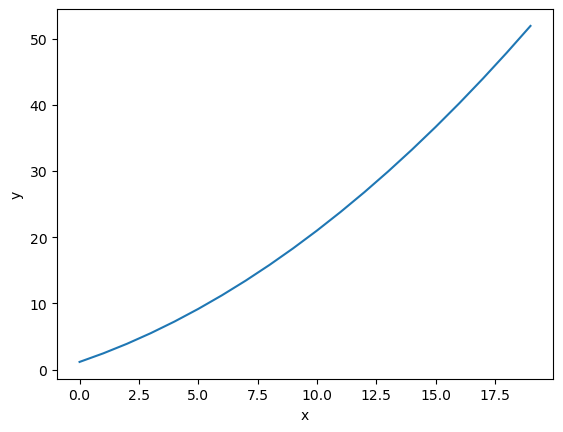

In [51]:
plt.plot(x_index, y_pred)
plt.xlabel("x")
plt.ylabel("y")